### Testing the API endpoint for FRED

In [1]:
import requests

/Users/mshinde/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Your FRED API key
api_key = '--add api key here--'
series_id = 'CUSR0000SEFP01'

# Construct the API URL
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json'

# Make the request
response = requests.get(url)
data = response.json()

# Print the data
print(data)


{'realtime_start': '2024-12-12', 'realtime_end': '2024-12-12', 'observation_start': '1600-01-01', 'observation_end': '9999-12-31', 'units': 'lin', 'output_type': 1, 'file_type': 'json', 'order_by': 'observation_date', 'sort_order': 'asc', 'count': 263, 'offset': 0, 'limit': 100000, 'observations': [{'realtime_start': '2024-12-12', 'realtime_end': '2024-12-12', 'date': '2003-01-01', 'value': '145.300'}, {'realtime_start': '2024-12-12', 'realtime_end': '2024-12-12', 'date': '2003-02-01', 'value': '143.800'}, {'realtime_start': '2024-12-12', 'realtime_end': '2024-12-12', 'date': '2003-03-01', 'value': '144.400'}, {'realtime_start': '2024-12-12', 'realtime_end': '2024-12-12', 'date': '2003-04-01', 'value': '145.500'}, {'realtime_start': '2024-12-12', 'realtime_end': '2024-12-12', 'date': '2003-05-01', 'value': '144.600'}, {'realtime_start': '2024-12-12', 'realtime_end': '2024-12-12', 'date': '2003-06-01', 'value': '145.700'}, {'realtime_start': '2024-12-12', 'realtime_end': '2024-12-12', '

In [3]:
import pandas as pd

# Extract observations
observations = data['observations']

# Convert to DataFrame
df = pd.DataFrame(observations)

# Convert 'value' column to numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Print the DataFrame
print(df)


    realtime_start realtime_end        date    value
0       2024-12-12   2024-12-12  2003-01-01  145.300
1       2024-12-12   2024-12-12  2003-02-01  143.800
2       2024-12-12   2024-12-12  2003-03-01  144.400
3       2024-12-12   2024-12-12  2003-04-01  145.500
4       2024-12-12   2024-12-12  2003-05-01  144.600
..             ...          ...         ...      ...
258     2024-12-12   2024-12-12  2024-07-01  236.292
259     2024-12-12   2024-12-12  2024-08-01  231.099
260     2024-12-12   2024-12-12  2024-09-01  234.939
261     2024-12-12   2024-12-12  2024-10-01  235.979
262     2024-12-12   2024-12-12  2024-11-01  241.051

[263 rows x 4 columns]


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['date'].min() , df['date'].max()

(Timestamp('2003-01-01 00:00:00'), Timestamp('2024-11-01 00:00:00'))

<Axes: title={'center': 'Personal Consumption Expenditures: Chain-type Price Index'}, xlabel='date', ylabel='Index 2012=100'>

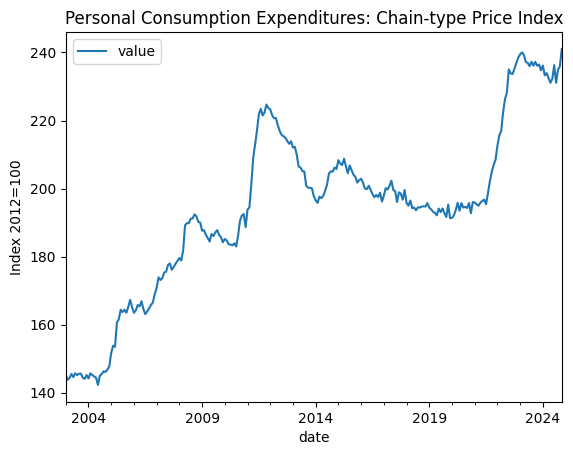

In [6]:
df.plot(x='date', y='value', title='Personal Consumption Expenditures: Chain-type Price Index', ylabel='Index 2012=100')